In [2]:
#Run this cell first.
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

**Quiz1**

Import ไฟล์ AB_NYC_2019 และ เช็คข้อมูลเบื้องต้น


In [ ]:
!wget https://raw.githubusercontent.com/deen666/Homework_DataCamp2/master/PROJECT%20I%20%E2%80%93%20Capstone/AB_NYC_2019.csv

In [3]:
!ls

AB_NYC_2019.csv  sample_data


In [3]:
#Quiz1

#df = pd.read_csv('AB_NYC_2019.csv') #My Gdrive Local path.
df = pd.read_csv('https://raw.githubusercontent.com/deen666/Homework_DataCamp2/master/PROJECT%20I%20%E2%80%93%20Capstone/AB_NYC_2019.csv') #or fetch from the URL.
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


 To check if there are any NA or NaN.

In [5]:
#df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.isnull().values.any()

True

In [6]:
df = df.dropna()
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Quiz2** 

สุ่มอ่านข้อมูล 10 แถว หัว 5 แถว และท้าย 10 แถว


In [6]:
#Quiz2

df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12946,9840355,Gorgeous apartment in West Village,3242525,Ther,Manhattan,West Village,40.73113,-74.00314,Entire home/apt,120,4,1,2016-07-06,0.03,1,0
31518,24539732,Sharp 1BR in FiDi by Sonder,12243051,Sonder,Manhattan,Financial District,40.70544,-74.00641,Entire home/apt,222,29,0,NaN,NaN,96,333
18255,14316198,Beautiful 1 bedroom in Brooklyn!!!!,72607058,Madi,Brooklyn,Prospect-Lefferts Gardens,40.65656,-73.95572,Entire home/apt,85,4,9,2017-08-27,0.25,1,0
21291,16933481,Entire 3rd Floor of Brooklyn brownstone,359480,Autumn,Brooklyn,South Slope,40.66398,-73.99041,Entire home/apt,77,3,4,2018-11-25,0.14,1,0
33216,26224487,3 bedroom 1200sq ft apt with exposed brick & deck,55978113,Alexis,Staten Island,Stapleton,40.63701,-74.07624,Private room,50,1,21,2019-07-07,1.81,2,363
11593,9024747,Tranquil Room :),47113234,Bryan,Brooklyn,Bushwick,40.69989,-73.92352,Private room,100,1,0,NaN,NaN,1,0
24019,19363728,Private Room in Great East Village Apartment!,27443386,Lauren,Manhattan,East Village,40.72036,-73.97889,Private room,50,1,2,2017-07-17,0.08,1,0
38149,30106990,NY MANHATTAN DOUBLE ROOM,224815152,Hudson River Hotel,Manhattan,Hell's Kitchen,40.75438,-73.99759,Private room,209,2,11,2019-05-16,1.63,8,73
7646,5758234,Soaring Bushwick 3 Bedroom,21823,Greg,Brooklyn,Bushwick,40.68780,-73.91452,Entire home/apt,225,3,82,2019-06-18,1.58,3,255
22211,17892920,"Spacious & Bright, Full Apt in Astoria/LIC",14991730,Trevor,Queens,Long Island City,40.75420,-73.92849,Entire home/apt,145,5,23,2019-06-24,2.15,1,173


In [7]:
#Quiz2

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
#Quiz2

df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Quiz3**

หา Top 10 Neighbourhood ยอดฮิต พร้อมระบุจำนวน

In [15]:
#Quiz3

#df.groupby(['neighbourhood']).size().reset_index(name='Count').sort_values('Count')[::-1].head(10)
df2 = df['neighbourhood'].value_counts()
df2 = pd.DataFrame(df2).head(10)
df2.rename(columns={'neighbourhood':'Count'})

,Count
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564
Midtown,1545


**Quiz4**

หา Bottom 10 Neighbourhood ยอดฮิต พร้อมระบุจำนวน

In [20]:
#Quiz4

df.groupby(['neighbourhood']).size().reset_index(name='Count').sort_values('Count')[::-1].tail(10)

,neighbourhood,Count
211,Westerleigh,2
100,Howland Hook,2
208,West Farms,2
42,Co-op City,2
219,Woodrow,1
141,New Dorp,1
215,Willowbrook,1
82,Fort Wadsworth,1
165,Richmondtown,1
172,Rossville,1


**Quiz5**

หา Top 10 Neighbourhood Group ยอดฮิต พร้อมระบุจำนวน

In [21]:
#Quiz5

df.groupby(['neighbourhood_group']).size().reset_index(name='Count').sort_values('Count')[::-1].head(10)

,neighbourhood_group,Count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


**Quiz6**

หา Bottom 10 Neighbourhood Group ยอดฮิต พร้อมระบุจำนวน

In [22]:
#Quiz6

df.groupby(['neighbourhood_group']).size().reset_index(name='Count').sort_values('Count')[::-1].tail(10)

,neighbourhood_group,Count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


**Quiz7**

หาค่าเฉลี่ยราคาของพื้นที่ และเขต

In [41]:
#Quiz7

#df.groupby('neighbourhood_group').mean()['price']
df.groupby('neighbourhood').agg(['mean'])['price']
#df.groupby('neighbourhood_group').agg({'price' : 'mean'})

,mean
neighbourhood,
Allerton,87.595238
Arden Heights,67.250000
Arrochar,115.000000
Arverne,171.779221
Astoria,117.187778
...,...
Windsor Terrace,138.993631
Woodhaven,67.170455
Woodlawn,60.090909


**Quiz8**

จงหาว่าห้องประเภทใดมีราคาเฉลี่ยมากที่สุด

In [43]:
#Quiz8

df.groupby('room_type').agg(['mean'])['price'].head(1)

,mean
room_type,
Entire home/apt,211.794246


**Quiz9**

จงหาว่าพื้นที่ใดมีข้อมูลพื้นที่อยู่แค่หน่วยเดียว

In [60]:
#Quiz9

df3 = df['neighbourhood'].value_counts()
df3 = pd.DataFrame(df3)
df3[df3['neighbourhood']==1]

,neighbourhood
Willowbrook,1
Fort Wadsworth,1
Richmondtown,1
New Dorp,1
Woodrow,1
Rossville,1


**Quiz10**

จงหาว่าที่พักแบบใดมีการให้บริการมากที่สุด และมากเท่าใด

In [68]:
#Quiz10

#df['room_type'].value_counts().head(1)
df['room_type'].value_counts().reset_index(name='Count').sort_values('Count')[::-1].head(1)

,index,Count
0,Entire home/apt,25409


**Quiz11**

จงหาว่าพื้นที่ใดมีจำนวนรีวิวมากที่สุด และ เขตใดมีจำนวนรีวิวมากที่สุด

In [70]:
#Quiz11

df.groupby('neighbourhood').sum().sort_values('number_of_reviews')[::-1].head(10)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Bedford-Stuyvesant,71288376210,233801887505,151112.25667,-274612.46521,399917,21130,110352,4874.52,9688,433181
Williamsburg,68791112560,177535858478,159593.24651,-289891.26672,563707,24415,85427,3475.77,5830,292913
Harlem,47113859448,159393456628,108488.99605,-196553.79883,316233,17050,75962,2956.23,5819,283283
Bushwick,49887640020,160903972314,100317.46664,-182213.72064,209033,14456,52514,2632.51,6379,235533
Hell's Kitchen,41406631290,179336244596,79812.30335,-144875.30837,400987,15992,50227,2818.79,25169,271862
East Village,30873735370,91403653299,75466.69263,-137092.08731,344812,11984,44670,1668.40,6724,138278
East Harlem,21095089838,76719071187,45569.29212,-82593.53246,148783,6543,36446,1579.06,2666,110553
Crown Heights,27447970869,79705120132,63612.10048,-115652.05148,175919,8793,36408,1560.82,2666,150176
Upper West Side,33347676355,119132458041,80394.05979,-145802.23102,415720,18759,36058,1487.27,13360,190366


In [71]:
df.groupby('neighbourhood_group').sum().sort_values('number_of_reviews')[::-1].head(10)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Brooklyn,367035792483,1140203577483,817931.96821,-1.486715e+06,2500600,121761,486574,21104.98,45925,2015070
Manhattan,406683958152,1469279004836,883012.01680,-1.602364e+06,4264527,185833,454569,21158.08,277073,2425586
Queens,123263814259,544824426112,230784.85597,-4.185631e+05,563867,29358,156950,8879.05,23005,818464
Bronx,24803796188,115220380205,44565.50071,-8.060805e+04,95459,4976,28371,1609.94,2437,180843
Staten Island,8055857451,36753031930,15147.61383,-2.764147e+04,42825,1802,11541,587.99,865,74480


**Quiz12** 

จงหา Top 3 จำนวน Minimum Nights ที่มีเขตไม่ซ้ำกัน


In [72]:
#Quiz12

df.sort_values('minimum_nights')[::-1].drop_duplicates('neighbourhood_group').head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,2018-06-24,0.57,1,90


**Quiz13**

จงหาชื่อ Host ที่ลิสที่อยู่มากที่สุด 10 อันดับแรก (Hint: ใช้ชื่อไม่ได้)

In [82]:
#Quiz13

df.groupby(['host_id','host_name']).mean().reset_index().sort_values('calculated_host_listings_count')[::-1].head(10)

,host_id,host_name,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
34629,219517861,Sonder (NYC),3.328918e+07,40.722502,-74.000577,253.195719,13.311927,3.917431,1.920580,327.0,301.492355
29393,107434423,Blueground,3.107775e+07,40.739673,-73.991947,303.150862,32.198276,0.125000,0.215714,232.0,253.810345
19564,30283594,Kara,1.332111e+07,40.755483,-73.987668,277.528926,31.132231,0.537190,0.091628,121.0,313.421488
31064,137358866,Kazuya,3.030625e+07,40.752971,-73.912234,43.825243,30.000000,0.844660,0.444706,103.0,196.475728
12799,12243051,Sonder,2.622013e+07,40.724568,-73.995714,213.031250,29.000000,0.447917,0.298276,96.0,276.614583
14429,16098958,Jeremy & Laura,1.647626e+07,40.760237,-73.978597,208.958333,30.000000,1.437500,0.119672,96.0,292.322917
25649,61391963,Corporate Housing,1.781361e+07,40.755541,-73.976226,146.241758,30.329670,4.582418,0.268101,91.0,241.923077
17084,22541573,Ken,1.586555e+07,40.749462,-73.984605,215.436782,30.000000,0.632184,0.108974,87.0,312.172414
33851,200380610,Pranjal,2.802791e+07,40.756832,-73.979005,290.230769,33.692308,0.015385,1.000000,65.0,338.030769
9727,7503643,Vida,3.889929e+06,40.726098,-73.941170,149.192308,30.000000,4.653846,0.101224,52.0,297.711538


**Quiz14**

จงหาชื่อ Host ที่มีชื่อซ้ำกันมากที่สุด 10 ชื่อ (โดยที่ไม่ใช้คนเดียวกัน)

In [84]:
#Quiz14

#df.drop_duplicates('host_id')
df6 = df.groupby(['host_id','host_name']).size().reset_index(name='Count').sort_values('Count')[::-1].head(10)

,host_id,host_name,Count
34629,219517861,Sonder (NYC),327
29393,107434423,Blueground,232
19564,30283594,Kara,121
31064,137358866,Kazuya,103
12799,12243051,Sonder,96
14429,16098958,Jeremy & Laura,96
25649,61391963,Corporate Housing,91
17084,22541573,Ken,87
33851,200380610,Pranjal,65
9727,7503643,Vida,52


In [87]:
df6['host_name'].value_counts().head(10)

Michael    335
David      318
Alex       226
Daniel     208
Sarah      199
John       188
Andrew     163
Chris      162
Maria      161
Anna       156
Name: host_name, dtype: int64

**Quiz15** 

จงหาชื่อ Host ที่มีรีวิวมากที่สุด 10 อันดับแรก

In [91]:
#Quiz15

df.groupby(['host_id','host_name'],as_index=False).sum().sort_values('number_of_reviews')[::-1].head(10)

,host_id,host_name,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
21304,37312959,Maya,51232186,203.85153,-369.38202,213,5,2273,53.53,25,824
1052,344035,Brooklyn& Breakfast -Len-,155403744,528.82140,-961.61568,970,13,2205,56.00,169,3723
18626,26432133,Danielle,74542317,203.81845,-369.35591,236,5,2017,68.02,25,1443
20872,35524316,Yasu & Akiko,76057984,448.36966,-813.89329,2055,11,1971,40.32,121,2559
21921,40176101,Brady,70447963,284.82642,-517.51220,523,7,1818,42.21,49,342
7362,4734398,Jj,2699036,122.46473,-221.81904,147,3,1798,23.04,9,974
14707,16677326,Alex And Zeena,170606621,488.98427,-887.95071,1020,12,1355,39.49,144,4193
9201,6885157,Randy,77457277,610.24558,-1109.25987,851,15,1346,25.15,225,4356
34629,219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588
17517,23591164,Angela,19864549,163.06493,-295.50711,260,4,1269,23.38,16,984


**Quiz16**

จงหาชื่อ Host ที่มีการลิสที่อยู่ที่มีราคาเฉลี่ยสูงที่สุด 10 อันดับแรก


In [93]:
#Quiz16

df.groupby(['host_id','host_name'],as_index=False).mean().sort_values('price')[::-1].head(10)

,host_id,host_name,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
26765,72390391,Jelena,22436899.0,40.77213,-73.98665,10000.0,30.0,0.0,NaN,1.0,83.0
7690,5143901,Erin,13894339.0,40.73260,-73.95739,10000.0,5.0,5.0,0.16,1.0,0.0
16306,20582832,Kathrine,7003697.0,40.76810,-73.91651,10000.0,100.0,2.0,0.04,1.0,0.0
2513,1235070,Olson,4737930.0,40.79264,-73.93898,9999.0,5.0,1.0,0.02,1.0,0.0
6982,4382127,Matt,31340283.0,40.71980,-73.98566,9999.0,30.0,0.0,NaN,1.0,365.0
6312,3906464,Amy,9528920.0,40.71355,-73.98507,9999.0,99.0,6.0,0.14,1.0,83.0
15375,18128455,Rum,23377410.0,40.72197,-74.00633,8500.0,30.0,2.0,0.18,1.0,251.0
9658,7407743,Jack,33007610.0,40.71162,-74.01693,7500.0,1.0,0.0,NaN,1.0,364.0
20805,35303743,Patricia,29547314.0,40.76835,-73.98367,6500.0,30.0,0.0,NaN,1.0,97.0
12489,11598359,Jonathan,2271504.0,40.68766,-73.96439,6500.0,1.0,0.0,NaN,1.0,0.0


**Quiz17**

จงเพิ่ม 2 คอลัมน์ชื่อ Year และ Month จาก last review ต่อท้าย โดยใช้ข้อมูลจากคอลัมน์ last_review (Hint: ใช้ lambda)


In [182]:
#Quiz17
df7 = df
df7 = df7.dropna()

In [183]:
df7['Year-LR'] = df7['last_review'].apply(lambda x: x.split('-')[0])
df7['Month-LR'] = df7['last_review'].apply(lambda x: x.split('-')[1])
df7['Day-LR'] = df7['last_review'].apply(lambda x: x.split('-')[2])
df7

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year-LR,Month-LR,Day-LR
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,2019,07,07
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,2019,07,07
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,2019,07,07
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,2019,07,07


**Quiz18**

สร้างคอลัมน์ใหม่ โดยให้บรรจุ Day-of-the-week (Mon, Tue....) โดยใช้ข้อมูลจาก last_review (Hint: ใช้ datetime กับ map มาช่วย) 

*กำหนดให้ 0 = Mon, 1= Tue, 2 = Wed, 3 = Thu, 4 = Fri, 5 = Sat, 6 = Sun*


In [ ]:
"""
dfx = pd.DataFrame({'my_dates':['2015-01-01','2015-01-02','2015-01-03'],'myvals':[1,2,3]})
dfx['my_dates'] = pd.to_datetime(dfx['my_dates'])
dfx['day_of_week'] = dfx['my_dates'].dt.day_name()
dfx
#https://www.thetopsites.net/article/51795405.shtml
"""

In [150]:
#Quiz18

df7['last_review'] = pd.to_datetime(df7['last_review'])
df7['Day-of-the-week'] = df7['last_review'].dt.day_name()
df7

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year-LR,Month-LR,Day-LR,Day-of-the-week
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19,Friday
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21,Tuesday
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05,Friday
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19,Monday
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,06,22,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,2019,07,07,Sunday
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,2019,07,07,Sunday
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,2019,07,07,Sunday
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,2019,07,07,Sunday


**Quiz19**

สร้าง Count Plot นับข้อมูลประเภทของที่อยู่อาศัย


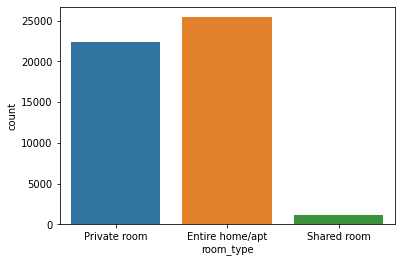

In [113]:
#Quiz19

sns.countplot(x='room_type', data=df)

**Quiz20**

สร้าง Pie Chart หาพื้นที่ ที่มีที่อยู่อาศัยเยอะที่สุด 5 อันดับแรก

In [118]:
#Quiz20

df8 = df.groupby(['neighbourhood']).size().reset_index(name='Count').sort_values('Count')[::-1].head(5)
fig = px.pie(df8,values='Count',names='neighbourhood')
fig.show()


**Quiz21**

สร้าง Box Plot โดยให้แกน X เป็น เขต และ Y เป็นจำนวนรีวิว

[(0.0, 80.0)]

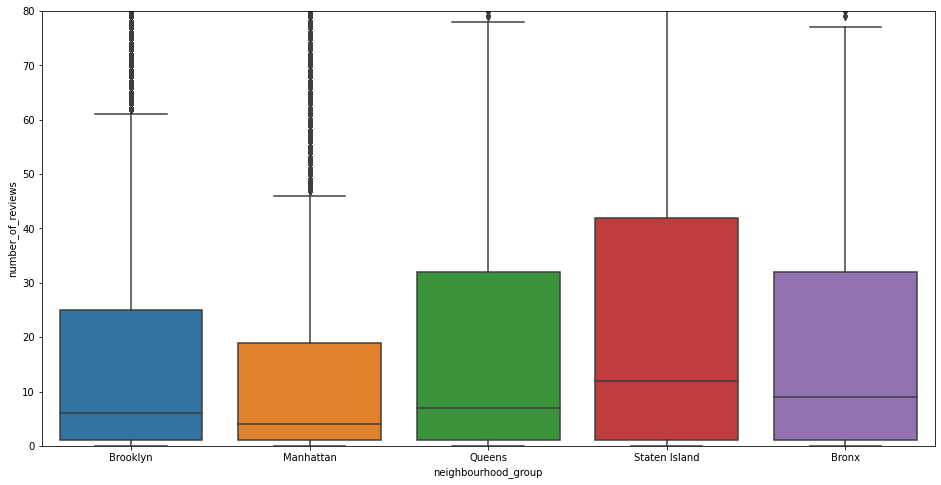

In [121]:
#Quiz21

fig = plt.figure(figsize=(16,8))
fig = sns.boxplot(x='neighbourhood_group',y='number_of_reviews',data=df)
fig.set(ylim=(0,80))

**Quiz22**

สร้าง HeatMap จาก Correlation ของ DataFrame และพิจารณาดูความสัมพันธ์ พร้อมกับนำความสัมพันธ์ที่เป็น Strongest Positive มาทำ Scatter Plot

In [124]:
#Quiz22

df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


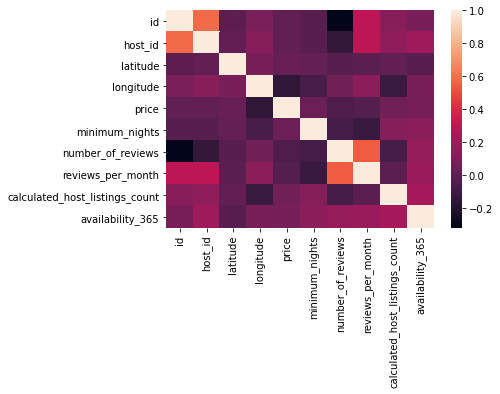

In [125]:
sns.heatmap(df.corr())

**Quiz23** 

สร้าง Count plot หาจำนวน Last review ของแต่ละเดือนของปี 2018

In [153]:
df9 = df7[df7['Year-LR']=='2018']
df9 = df9.groupby('Month-LR').sum()
df9

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Month-LR,,,,,,,,,,
01,8717306388,24608821991,22566.38359,-40970.54753,74383,4761,5696,145.43,1703,22415
02,2400431751,7206404349,5784.11124,-10501.47476,15788,1302,1229,41.12,348,5832
03,3520732100,10511018371,8512.43504,-15456.42987,32670,2213,2213,68.22,1104,13010
04,5315104450,15235621232,12749.89505,-23147.90973,37384,3436,3494,107.04,1485,16400
05,6460611879,18200017540,16333.57115,-29656.59039,52156,3266,3901,123.41,1445,28307
06,6376101727,17620032395,15557.98161,-28251.39420,50372,4583,4963,152.31,1122,24723
07,8527690102,23993350432,20608.94049,-37420.66701,64656,4802,5409,179.47,2327,36866
08,10934804415,29893552009,27940.26949,-50732.63808,95417,7774,7203,232.46,3328,54634
09,10701239003,27906356137,25860.67274,-46958.56301,92241,5118,8322,264.77,2164,60371


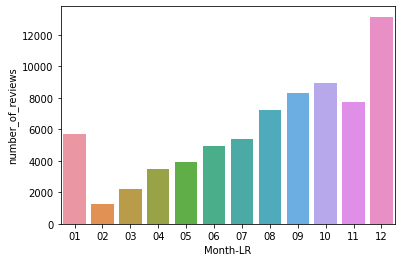

In [140]:
sns.barplot(x=df9.index,y='number_of_reviews',data=df9)

**Quiz24** 

สร้าง Pie Chart หาอัตราส่วน Last Review ในแต่ละวัน

In [151]:
fig = px.pie(df7,values='number_of_reviews', names='Day-of-the-week')
fig.show()

**Quiz25** 

สร้าง Line Graph หาราคาเฉลี่ยในแต่ละเดือน ในปี 2019

In [163]:
dfx = df7.groupby('Month-LR').mean().reset_index()
dfx

,Month-LR,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,01,1.551053e+07,4.486266e+07,40.730098,-73.955636,150.492769,7.469993,11.130152,0.367285,3.782357,63.516992
1,02,1.783561e+07,5.994044e+07,40.728699,-73.953710,155.716883,8.876623,12.301299,0.482481,7.427273,82.189610
2,03,1.761910e+07,5.763593e+07,40.729060,-73.954878,136.836957,9.510870,11.670807,0.495179,6.717391,90.302795
3,04,1.752868e+07,5.526744e+07,40.728907,-73.954951,139.504979,8.012328,14.503556,0.592987,5.732575,97.717402
4,05,1.818863e+07,6.111282e+07,40.729226,-73.953101,137.920638,7.370851,20.178085,0.873379,7.124468,130.874255
5,06,1.985471e+07,7.764933e+07,40.727937,-73.948555,140.772413,4.110187,46.238996,2.094385,6.563595,147.284852
6,07,2.086548e+07,8.188733e+07,40.725005,-73.945203,142.321928,3.668970,42.701837,2.561805,2.326648,130.171583
7,08,1.268086e+07,3.462622e+07,40.729453,-73.956159,132.254360,8.603728,7.707156,0.216452,3.378833,51.974744
8,09,1.287493e+07,3.472904e+07,40.726459,-73.954201,149.494463,7.157655,9.278827,0.262332,2.764821,67.723127
9,10,1.362860e+07,3.956147e+07,40.726767,-73.953794,142.031068,7.380583,9.816828,0.298602,3.781877,85.071845


In [165]:
fig = px.line(dfx, x='Month-LR', y='price')
fig.show()

**Quiz26**

สร้าง Column ใหม่ โดยคำนวณ ณ เวลาปัจจุบันถึงวันที่ Last Review ห่างกันกี่วัน (Hint: ใช้ datetime ปัจจุบัน - datetime last review)

In [214]:
from datetime import date
today = date.today()
TodayStamp = pd.to_datetime(pd.Timestamp.today())
df7['time_today'] = today

#https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-and-timedelta-arithmetic

In [215]:
#Convert for the same dtype to subtraction.
df7['last_review'] = pd.to_datetime(df7['last_review'])
#df7['last_review'] = df['last_review'].apply(lambda x: pd.Timestamp(x))
df7['time_today'] = pd.to_datetime(df7['time_today'])
#df7['time_delta'] = (df7.time_today - df7.last_review)
df7['Diff'] =  df7['time_today'].subtract(df7['last_review'])
df7['time_delta'] = df7['last_review'].apply(lambda x:(TodayStamp-x).days)
df7

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year-LR,Month-LR,Day-LR,time_today,last_reviewx,Diff,time_delta
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19,2020-08-24,2018-10-19,675 days,675
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,21,2020-08-24,2019-05-21,461 days,461
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,05,2020-08-24,2019-07-05,416 days,416
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,19,2020-08-24,2018-11-19,644 days,644
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,2019,06,22,2020-08-24,2019-06-22,429 days,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,2019,07,07,2020-08-24,2019-07-07,414 days,414
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,2019,07,07,2020-08-24,2019-07-07,414 days,414
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,2019,07,07,2020-08-24,2019-07-07,414 days,414
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,2019,07,07,2020-08-24,2019-07-07,414 days,414



**Quiz27**

สร้าง Pie Chart ของระยะห่างของเวลา ระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละเขต (หน่วยเป็นวัน)

In [218]:
df11 = df7.groupby('neighbourhood_group').mean().reset_index()
df11

,neighbourhood_group,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,time_delta
0,Bronx,2.146467e+07,1.007614e+08,40.848317,-73.883881,79.558857,3.932571,32.381714,1.838549,2.205714,171.106286,544.595429
1,Brooklyn,1.754307e+07,5.470511e+07,40.684796,-73.951028,121.463289,5.320153,29.574427,1.283356,2.233530,105.847862,698.036073
2,Manhattan,1.767847e+07,6.326251e+07,40.765975,-73.973898,180.071596,7.013477,27.322423,1.271756,8.774141,109.340112,718.615426
3,Queens,2.079463e+07,9.285907e+07,40.731381,-73.871199,95.783683,4.222441,34.318023,1.941923,3.355424,150.554899,594.747375
4,Staten Island,2.105923e+07,9.740580e+07,40.611207,-74.104838,89.964968,3.420382,36.754777,1.872580,2.388535,205.640127,508.592357


In [219]:
fig = px.pie(df7, values='time_delta',names='neighbourhood_group')
fig.show()

**Quiz28** 

สร้าง Bar Plot ของระยะห่างของเวลา ระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละพื้นที่ 10 พื้นที่แรกที่มีระยะเวลามากที่สุด (หน่วยเป็นวัน)

In [220]:
df12 = df7.groupby('neighbourhood').mean().reset_index()
df12 = df12.sort_values('time_delta')[::-1].head(10)
df12

,neighbourhood,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,time_delta
42,Co-op City,2.213346e+06,6.335556e+06,40.864815,-73.823240,77.500000,2.500000,17.000000,0.245000,7.000000,364.000000,1189.000000
172,Sea Gate,1.502470e+07,7.752064e+07,40.576690,-74.009848,482.500000,3.500000,2.500000,0.330000,2.000000,110.000000,1018.000000
6,Battery Park City,1.596901e+07,5.994338e+07,40.710657,-74.016298,182.194444,10.944444,16.111111,0.675556,7.888889,71.194444,1005.888889
120,Marble Hill,1.535348e+07,5.296699e+07,40.875741,-73.910818,94.000000,2.300000,16.800000,0.724000,1.400000,106.800000,975.200000
134,Mount Eden,1.407332e+07,6.529976e+07,40.842308,-73.915446,60.600000,1.800000,84.000000,1.784000,1.000000,163.400000,933.400000
129,Morningside Heights,1.650526e+07,5.165550e+07,40.808451,-73.961664,113.956349,4.797619,18.250000,0.991508,1.515873,45.396825,869.793651
37,Civic Center,1.643940e+07,4.187293e+07,40.713976,-74.003021,169.833333,5.066667,21.233333,0.775667,3.466667,66.133333,838.333333
107,Kensington,1.594435e+07,5.435426e+07,40.642181,-73.975870,88.192857,4.764286,21.228571,1.039143,2.192857,89.178571,815.028571
167,Roosevelt Island,1.909036e+07,7.455947e+07,40.763177,-73.948611,114.106061,6.772727,18.393939,1.060152,1.272727,81.212121,814.303030
200,Upper West Side,1.563387e+07,5.442923e+07,40.788609,-73.973625,186.612686,8.259109,24.330634,1.003556,4.645749,97.101889,811.628880


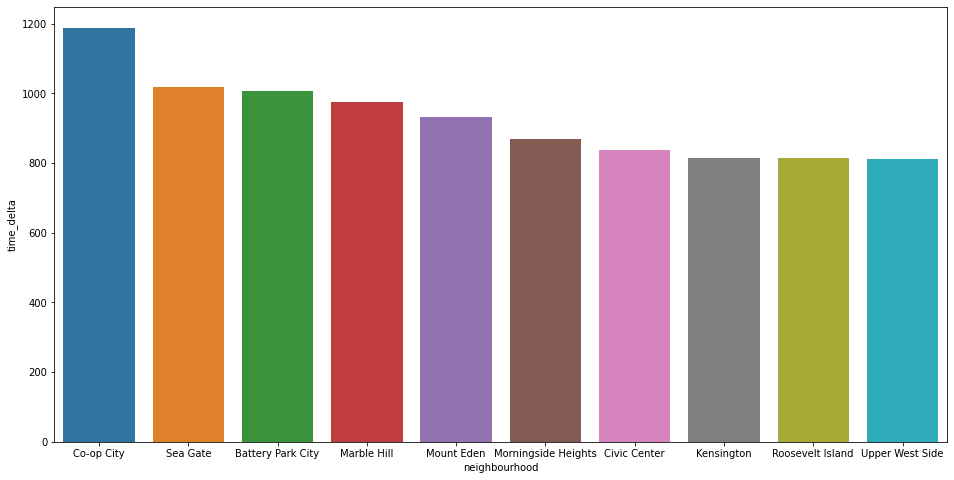

In [222]:
fig = plt.figure(figsize=(16,8))
sns.barplot(x='neighbourhood',y="time_delta",data=df12)

**Quiz29** 

สร้าง Bar Plot ของค่าเฉลี่ยระยะเวลาห่างระหว่างปัจจุบันถึง Last review เฉลี่ย ของแต่ละพื้นที่ 10 พื้นที่แรกที่มีระยะเวลาน้อยที่สุด 

In [226]:
df13 = df7.groupby('neighbourhood').mean().reset_index().sort_values('time_delta').head(10)
df13

,neighbourhood,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,time_delta
100,Huguenot,2.711777e+07,9.108983e+07,40.539467,-74.171680,118.333333,1.666667,55.666667,3.760000,1.666667,208.000000,414.333333
69,Eltingville,9.631690e+06,1.612490e+07,40.541870,-74.154600,63.000000,3.000000,114.000000,2.470000,1.000000,274.500000,418.000000
170,Rossville,2.625835e+07,6.402171e+06,40.547900,-74.210170,75.000000,3.000000,21.000000,1.690000,1.000000,59.000000,420.000000
33,Castleton Corners,1.304337e+07,5.662384e+07,40.615525,-74.126390,182.000000,2.500000,50.500000,1.930000,1.000000,195.000000,421.000000
128,Mill Basin,2.625635e+07,1.811127e+08,40.612383,-73.915850,179.750000,2.250000,17.250000,2.127500,1.000000,290.000000,421.000000
138,Neponsit,1.728793e+07,9.708823e+07,40.570630,-73.859217,274.666667,2.000000,15.333333,1.600000,1.000000,231.000000,423.666667
193,Tottenville,2.091681e+07,8.376822e+07,40.508916,-74.238408,160.800000,2.600000,27.800000,1.146000,1.400000,228.800000,424.800000
139,New Brighton,2.594010e+07,1.059109e+08,40.642608,-74.092958,101.800000,7.800000,40.200000,2.416000,1.400000,142.600000,425.200000
14,Belle Harbor,2.022022e+07,4.085485e+07,40.575726,-73.849912,166.400000,1.600000,14.800000,1.644000,1.400000,279.400000,426.400000
168,Rosebank,3.022658e+07,1.904695e+08,40.612149,-74.070991,111.857143,2.142857,30.714286,3.812857,1.000000,175.142857,427.285714


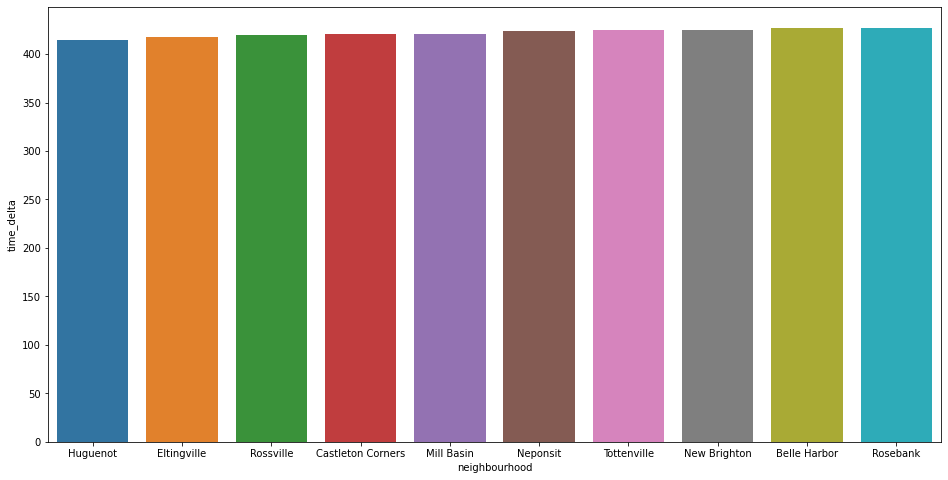

In [227]:
fig = plt.figure(figsize=(16,8))
sns.barplot(x='neighbourhood',y="time_delta",data=df13)

**Quiz30** 

สร้าง Scatter Plot หาความสัมพันธ์ระหว่าง ระยะเวลาห่างระหว่างปัจจุบันถึง Last review กับ Minimum Nights (Hint: Correlation)


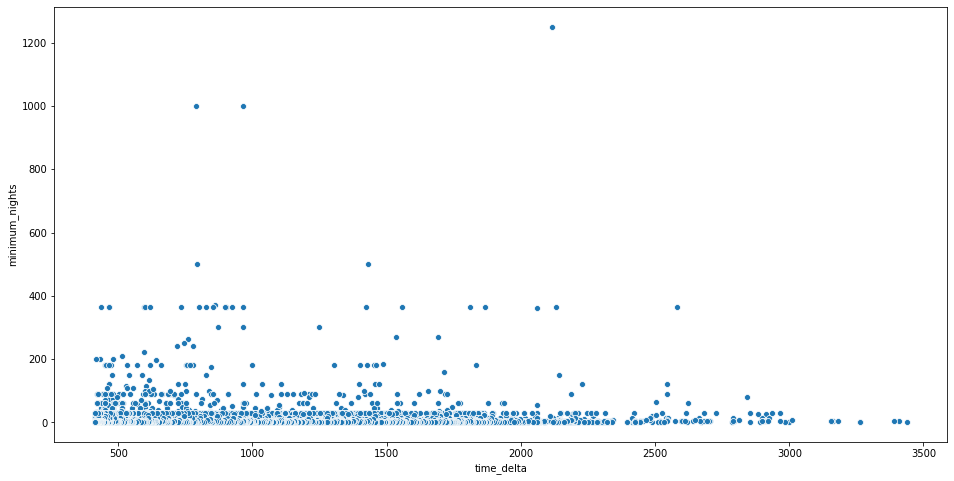

In [234]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(x='time_delta', y='minimum_nights', data=df7)